In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import time
import radio_snr as rad
from mpl_toolkits import mplot3d
%matplotlib inline

In [46]:
df = pd.read_csv('wspr_sample.csv',index_col=0)
df = rad.preprocess_data(df)
#sunspot_df = pd.read_csv('SN_d_tot_V2.0.csv',sep=(';'))
#sunspot_df=rad.fix_sunspot_dataframe(sunspot_df)
#df=rad.sunspot_addition(df,sunspot_df)

In [47]:
df.head(10)

,spot,reporter,snr,frequency,tx_call,power,drift,distance,azimuth,band,version,code,rx_lat,rx_long,tx_lat,tx_long,day,hour
4541493,1093722523,DC5AL-R,9,7.040113,G0NJS,37,0,496,91,7,NaN,0,51.437500,6.958333,51.770833,-0.208333,17595,10
4692526,1093866340,KA3JIJ,-27,10.140175,WB0KSL,37,0,1105,113,10,NaN,0,34.395833,-83.791667,38.854167,-94.875000,17595,14
17907988,1107180087,PI9ESA,-5,10.140179,IQ6KX,20,0,1172,328,10,NaN,0,52.229167,4.458333,43.604167,13.541667,17608,11
10270295,1099476317,PA0EHG,-17,3.594176,PA7MDJ,23,0,33,350,3,NaN,0,52.062500,4.625000,51.770833,4.708333,17601,0
29854808,1119235300,AG5OV,-10,7.040137,WA4KFZ,37,0,2236,249,7,1.9.0-rc3,0,29.000000,-100.000000,38.895833,-77.458333,17621,11
17284312,1106552709,DL1KAI,-13,5.366268,G4ZFQ,30,0,787,72,5,1.8.0,0,52.395833,9.791667,50.729167,-1.291667,17607,18
22005641,1111287751,KV0S,-20,10.140179,VA3UAL,27,0,1251,244,10,1.8.0,0,38.000000,-94.000000,44.104167,-80.041667,17613,0
9448304,1098651931,K3SC,-4,7.040181,WV5L,37,0,878,47,7,1.6.0,0,39.312500,-77.041667,34.104167,-84.458333,17600,0
448744,1089591346,G7VGY,-18,7.040094,PA0ANH,27,-1,465,251,7,1.9.0-rc2,0,50.770833,-1.291667,52.312500,4.958333,17591,11
9784893,1098988233,SM0EPX/RX2,-20,10.140144,9A9Y,10,0,1493,2,10,1.6.0,0,59.354167,17.541667,45.937500,16.708333,17600,9


In [48]:
df.shape

(15241, 18)

In [49]:
df=df.drop(['spot','reporter','version','code','tx_call'],axis = 1)
df.iloc[:,1:] = df.astype(float)
df.head(2)

,snr,frequency,power,drift,distance,azimuth,band,rx_lat,rx_long,tx_lat,tx_long,day,hour
4541493,9,7.040113,37.0,0.0,496.0,91.0,7.0,51.437500,6.958333,51.770833,-0.208333,17595.0,10.0
4692526,-27,10.140175,37.0,0.0,1105.0,113.0,10.0,34.395833,-83.791667,38.854167,-94.875000,17595.0,14.0


In [50]:
df['power'] = (10**(df['power'].astype(float)/10.0))/1000
#df['snr'] =  (10**(df['snr'].astype(float)/10.0))

In [51]:
df.head(5)

,snr,frequency,power,drift,distance,azimuth,band,rx_lat,rx_long,tx_lat,tx_long,day,hour
4541493,9,7.040113,5.011872,0.0,496.0,91.0,7.0,51.437500,6.958333,51.770833,-0.208333,17595.0,10.0
4692526,-27,10.140175,5.011872,0.0,1105.0,113.0,10.0,34.395833,-83.791667,38.854167,-94.875000,17595.0,14.0
17907988,-5,10.140179,0.100000,0.0,1172.0,328.0,10.0,52.229167,4.458333,43.604167,13.541667,17608.0,11.0
10270295,-17,3.594176,0.199526,0.0,33.0,350.0,3.0,52.062500,4.625000,51.770833,4.708333,17601.0,0.0
29854808,-10,7.040137,5.011872,0.0,2236.0,249.0,7.0,29.000000,-100.000000,38.895833,-77.458333,17621.0,11.0


In [52]:
features = df.iloc[:,1:]
target = df.iloc[:,0]
features.head(1)

,frequency,power,drift,distance,azimuth,band,rx_lat,rx_long,tx_lat,tx_long,day,hour
4541493,7.040113,5.011872,0.0,496.0,91.0,7.0,51.4375,6.958333,51.770833,-0.208333,17595.0,10.0


In [53]:
target.head(1)

4541493    9
Name: snr, dtype: int64

In [54]:
features = (features.astype(float)-features.astype(float).mean())/features.astype(float).std()
features = (features.astype(float)-features.astype(float).mean())/features.astype(float).std()

In [55]:
features.describe()

,frequency,power,drift,distance,azimuth,band,rx_lat,rx_long,tx_lat,tx_long,day,hour
count,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04,1.524100e+04
mean,3.090792e-17,1.196034e-16,-1.072417e-16,8.056602e-18,-2.722927e-17,-2.832486e-16,1.491491e-17,-1.742878e-16,-1.488213e-17,9.868973e-17,8.359052e-16,-2.407875e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.999214e-01,-3.075433e-01,-5.526460e+00,-7.916091e-01,-1.561075e+00,-7.668196e-01,-7.236183e+00,-2.416607e+00,-9.018916e+00,-2.430873e+00,-1.613571e+00,-1.853044e+00
25%,-2.226810e-01,-2.873587e-01,1.871613e-01,-4.988580e-01,-9.353366e-01,-2.357006e-01,-2.984347e-01,-1.009458e+00,-3.160459e-01,-1.027548e+00,-8.365131e-01,-7.948802e-01
50%,-7.377080e-02,-2.059728e-01,1.871613e-01,-3.035468e-01,-6.474449e-02,-5.866087e-02,2.926267e-01,5.091778e-01,2.213677e-01,4.197012e-01,-5.945543e-02,1.121176e-01
75%,2.020107e-01,2.019232e-01,1.871613e-01,4.482279e-02,9.872209e-01,2.068986e-01,5.132897e-01,6.146387e-01,5.355931e-01,5.863129e-01,8.286105e-01,8.679490e-01
max,4.155586e+01,5.064917e+01,5.900783e+00,7.264869e+00,1.703646e+00,4.136862e+01,1.574573e+00,3.584867e+00,2.539881e+00,3.592897e+00,1.716676e+00,1.623780e+00


In [32]:
start_trees = 100.0
stop_trees = 10100.0
step_trees = 1000.0
start_depth =15.0
stop_depth = 35.0
step_depth = 5.0
#creating results dataframes
test_error = pd.DataFrame(np.zeros((int((stop_trees-start_trees)/step_trees),int((stop_depth-start_depth)/step_depth))))
R_sqrd = pd.DataFrame(np.zeros((int((stop_trees-start_trees)/step_trees),int((stop_depth-start_depth)/step_depth))))

#timing
start = time.time()

#creating loop to fill error dataframe
for k in range(int(start_depth),int(stop_depth),int(step_depth)):
    for j in range(int(start_trees),int(stop_trees),int(step_trees)):
        rf = RandomForestRegressor(n_estimators=j,max_depth=k,max_features='sqrt',oob_score=True)
        rf.fit(features,target)
        print(int((float(j)-start_trees)/step_trees),int((float(k)-start_depth)/step_depth))
        test_error.iloc[int((float(j)-start_trees)/step_trees),int((float(k)-start_depth)/step_depth)]=rf.oob_score_
        R_sqrd.iloc[int((float(j)-start_trees)/step_trees),int((float(k)-start_depth)/step_depth)]=rf.score(features,target)
end=time.time()
print(end-start)

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
9 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
9 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
9 3
4538.37294793129


In [33]:
#finding rmse of best fiting RFR
rf = RandomForestRegressor(n_estimators=np.where(test_error.values==test_error.max().max())[0][0],
                           max_depth=np.where(test_error.values==test_error.max().max())[1][0],
                           max_features='sqrt',oob_score=False)
rf.fit(features,target)
mse=-1*cross_val_score(rf,features,target,cv=10,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse.mean())
rmse

9.228919631644514

In [34]:
np.where(test_error.values==test_error.max().max())

(array([4], dtype=int64), array([3], dtype=int64))

In [35]:
R_sqrd.max().max()

0.8950814409868395

In [36]:
test_error.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.230561,0.248323,0.252076,0.252332
std,0.002956,0.005523,0.006809,0.007610
min,0.222365,0.232653,0.232720,0.230795
25%,0.231465,0.249782,0.253856,0.253735
50%,0.231607,0.250027,0.254173,0.254898
75%,0.231848,0.250282,0.254543,0.255202
max,0.231916,0.250673,0.254657,0.255743


In [37]:
R_sqrd.describe()

,0,1,2,3
count,10.000000,10.000000,10.000000,10.000000
mean,0.589696,0.793313,0.874230,0.894357
std,0.000626,0.000839,0.001463,0.001903
min,0.588599,0.791516,0.870177,0.888946
25%,0.589429,0.793018,0.874431,0.894882
50%,0.589562,0.793316,0.874807,0.894942
75%,0.590042,0.793696,0.874880,0.895002
max,0.590922,0.794751,0.875016,0.895081


In [38]:
fig1 = plt.figure()
fig2 = plt.figure()

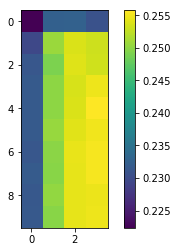

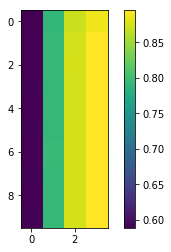

In [39]:
plt.imshow(test_error)
colorAxis = fig1.add_axes([19,0,19,0])
colorAxis.patch.set_alpha(0)
plt.colorbar(orientation='vertical')
plt.show()
plt.imshow(R_sqrd)
colorAxis2 = fig2.add_axes([19,0,19,0])
colorAxis2.patch.set_alpha(0)
plt.colorbar(orientation='vertical')
plt.show()

In [40]:
test_error.max().max()

0.2557428192924486

In [41]:
test_error_values = test_error.values

In [42]:
np.where(test_error_values==test_error.min().min())

(array([0], dtype=int64), array([0], dtype=int64))

In [ ]:
#finding rmse of best fiting RFR
rf = RandomForestRegressor(n_estimators=4100,
                           max_depth=35,
                           max_features='sqrt',oob_score=False)
rf.fit(features,target)
mse=-1*cross_val_score(rf,features,target,cv=10,scoring='neg_mean_squared_error')
rmse=np.sqrt(mse.mean())
rmse